In [30]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.font_manager as font_manager
from matplotlib.patches import Rectangle
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import seaborn as sns
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib import rcParams
from scipy.interpolate import griddata

sns.set_theme(style="white")
font_path = (
    "/home/femtomc/.local/share/fonts/Unknown Vendor/TrueType/Lato/Lato_Bold.ttf"
)
font_manager.fontManager.addfont(font_path)
custom_font_name = font_manager.FontProperties(fname=font_path).get_name()
rcParams["font.family"] = custom_font_name
rcParams["figure.autolayout"] = True
label_fontsize = 70  # Set the desired font size here

In [31]:
enum_air = pd.read_csv("./training_runs/grasp_enum_epochs_201_mccoy_prior.csv")

In [32]:
enum_air

,ELBO Loss,Accuracy,Epoch wall clock times
0,406.165619,0.253900,5.984228
1,459.204712,0.288133,12.712786
2,459.741974,0.304867,19.022584
3,459.913513,0.317133,25.153413
4,459.978790,0.323717,31.538438
...,...,...,...
196,641.332703,0.982867,1226.361116
197,641.321106,0.982750,1232.372053
198,641.090088,0.982700,1238.427164
199,641.293884,0.982667,1244.551564


In [33]:
reinforce_air = pd.read_csv(
    "./training_runs/grasp_reinforce_epochs_201_mccoy_prior.csv"
)

In [34]:
reinforce_air

,ELBO Loss,Accuracy,Epoch wall clock times
0,-80.348763,0.242250,1.284094
1,398.756470,0.239267,2.689318
2,419.483551,0.242783,4.091410
3,437.930939,0.254300,5.468961
4,451.005463,0.259900,6.875813
...,...,...,...
196,631.339661,0.962833,300.501554
197,632.021423,0.966750,301.985275
198,631.884216,0.950433,303.542226
199,631.813354,0.962867,304.973011


In [35]:
reinforce_iwae_air = pd.read_csv(
    "./training_runs/grasp_iwae_n_2_reinforce_epochs_201_mccoy_prior.csv"
)

In [36]:
reinforce_iwae_air

,ELBO Loss,Accuracy,Epoch wall clock times
0,240.354416,0.250283,2.193514
1,425.550537,0.261350,4.309016
2,445.176849,0.282067,6.422807
3,458.446442,0.310233,8.582552
4,466.885651,0.347583,10.696643
...,...,...,...
196,632.078674,0.920583,450.261934
197,631.884033,0.956417,452.634035
198,632.381531,0.954467,454.967940
199,632.653931,0.956817,457.361122


In [37]:
pyro_reinforce_air = pd.read_csv(
    "./training_runs/pyro_reinforce_epochs_40_mccoy_prior.csv"
)

In [38]:
pyro_reinforce_air

,ELBO Loss,Accuracy,Epoch wall clock times
0,-468.330680,0.226100,36.947689
1,-508.883831,0.231917,74.597317
2,-532.577006,0.254967,111.778180
3,-547.027413,0.289717,147.704097
4,-554.888481,0.335017,183.794181
5,-560.892933,0.353217,219.690086
6,-565.877841,0.342067,256.308299
7,-569.295938,0.369967,292.151272
8,-573.079279,0.336933,328.200723
9,-574.865513,0.383050,364.414620


In [39]:
np.array(reinforce_air["Epoch wall clock times"])

array([  1.28409381,   2.68931814,   4.0914099 ,   5.46896066,
         6.87581252,   8.29727501,   9.66072773,  11.13924283,
        12.70548595,  14.22604883,  15.73885016,  17.28006284,
        18.77563816,  20.32166775,  21.9190288 ,  23.58230716,
        25.14960978,  26.63691427,  28.17838119,  29.76192435,
        31.25120999,  32.73439087,  34.22992157,  35.78690395,
        37.50976399,  39.17046201,  40.64719235,  42.11075685,
        43.65066654,  45.16132917,  46.67974851,  48.1948449 ,
        49.68750299,  51.20614046,  52.72997245,  54.26878435,
        55.7626541 ,  57.27873644,  58.82412606,  60.33058242,
        61.83281897,  63.33184133,  64.82572356,  66.28150875,
        67.80048681,  69.31399786,  70.82976873,  72.41366305,
        73.90827995,  75.42677906,  76.93641227,  78.47331415,
        79.99744956,  81.49855657,  82.97735581,  84.51312729,
        86.03462656,  87.55040742,  89.0420477 ,  90.58866404,
        92.0758547 ,  93.57955844,  95.11594703,  96.64

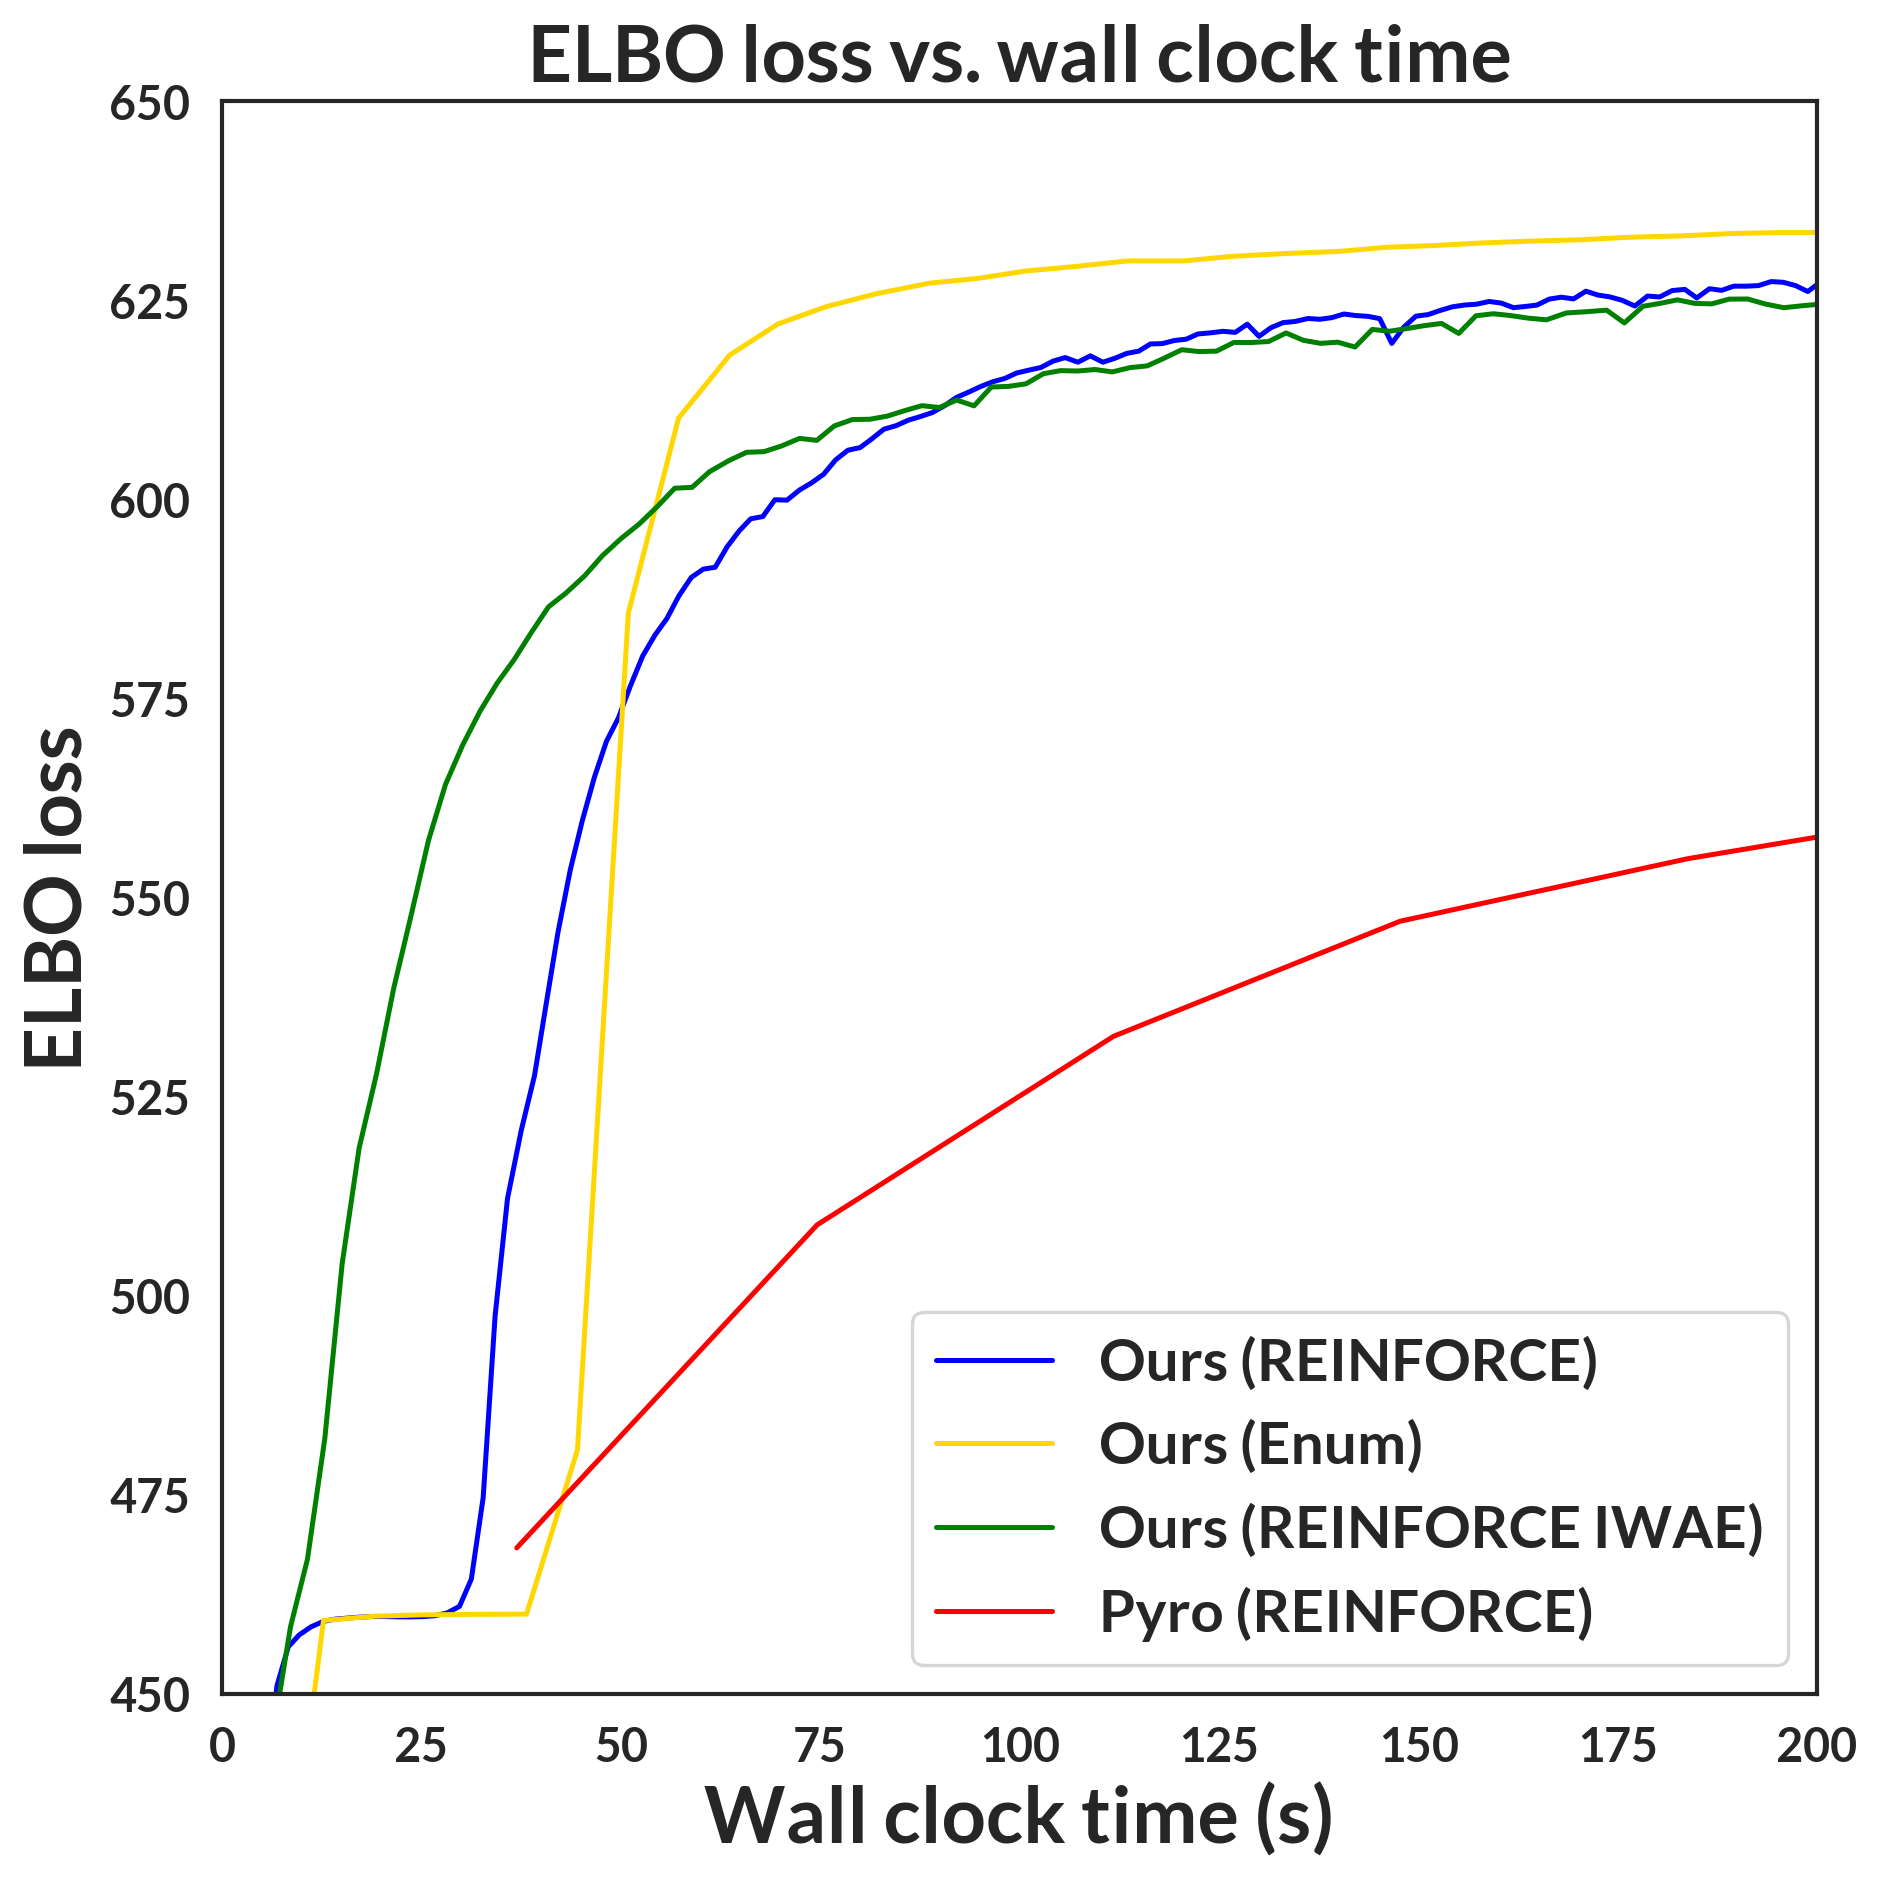

In [85]:
plt.rcParams["text.usetex"] = False
fig, ax = plt.subplots(figsize=(8, 8), dpi=240)
ax.set_xlim(0, 200)
ax.set_ylim(450, 650)
ax.plot(
    np.array(reinforce_air["Epoch wall clock times"]),
    np.array(reinforce_air["ELBO Loss"]),
    label="Ours (REINFORCE)",
    color="blue",
)
ax.plot(
    np.array(enum_air["Epoch wall clock times"]),
    np.array(enum_air["ELBO Loss"]),
    label="Ours (Enum)",
    color="gold",
)
ax.plot(
    np.array(reinforce_iwae_air["Epoch wall clock times"]),
    np.array(reinforce_iwae_air["ELBO Loss"]),
    label="Ours (REINFORCE IWAE)",
    color="green",
)
ax.plot(
    np.array(pyro_reinforce_air["Epoch wall clock times"]),
    -1 * np.array(pyro_reinforce_air["ELBO Loss"]),
    label="Pyro (REINFORCE)",
    color="red",
)

plt.title("ELBO loss vs. wall clock time", fontsize=label_fontsize / 3)
plt.xlabel("Wall clock time (s)", fontsize=label_fontsize / 3)
plt.ylabel("ELBO loss", fontsize=label_fontsize / 3)
plt.legend(fontsize=label_fontsize / 4)
plt.xticks(fontsize=label_fontsize / 5)
plt.yticks(fontsize=label_fontsize / 5)
plt.legend(fontsize=label_fontsize / 4)
fig.savefig("img/elbo_vs_wall_clock.pdf", format="pdf")
plt.show()

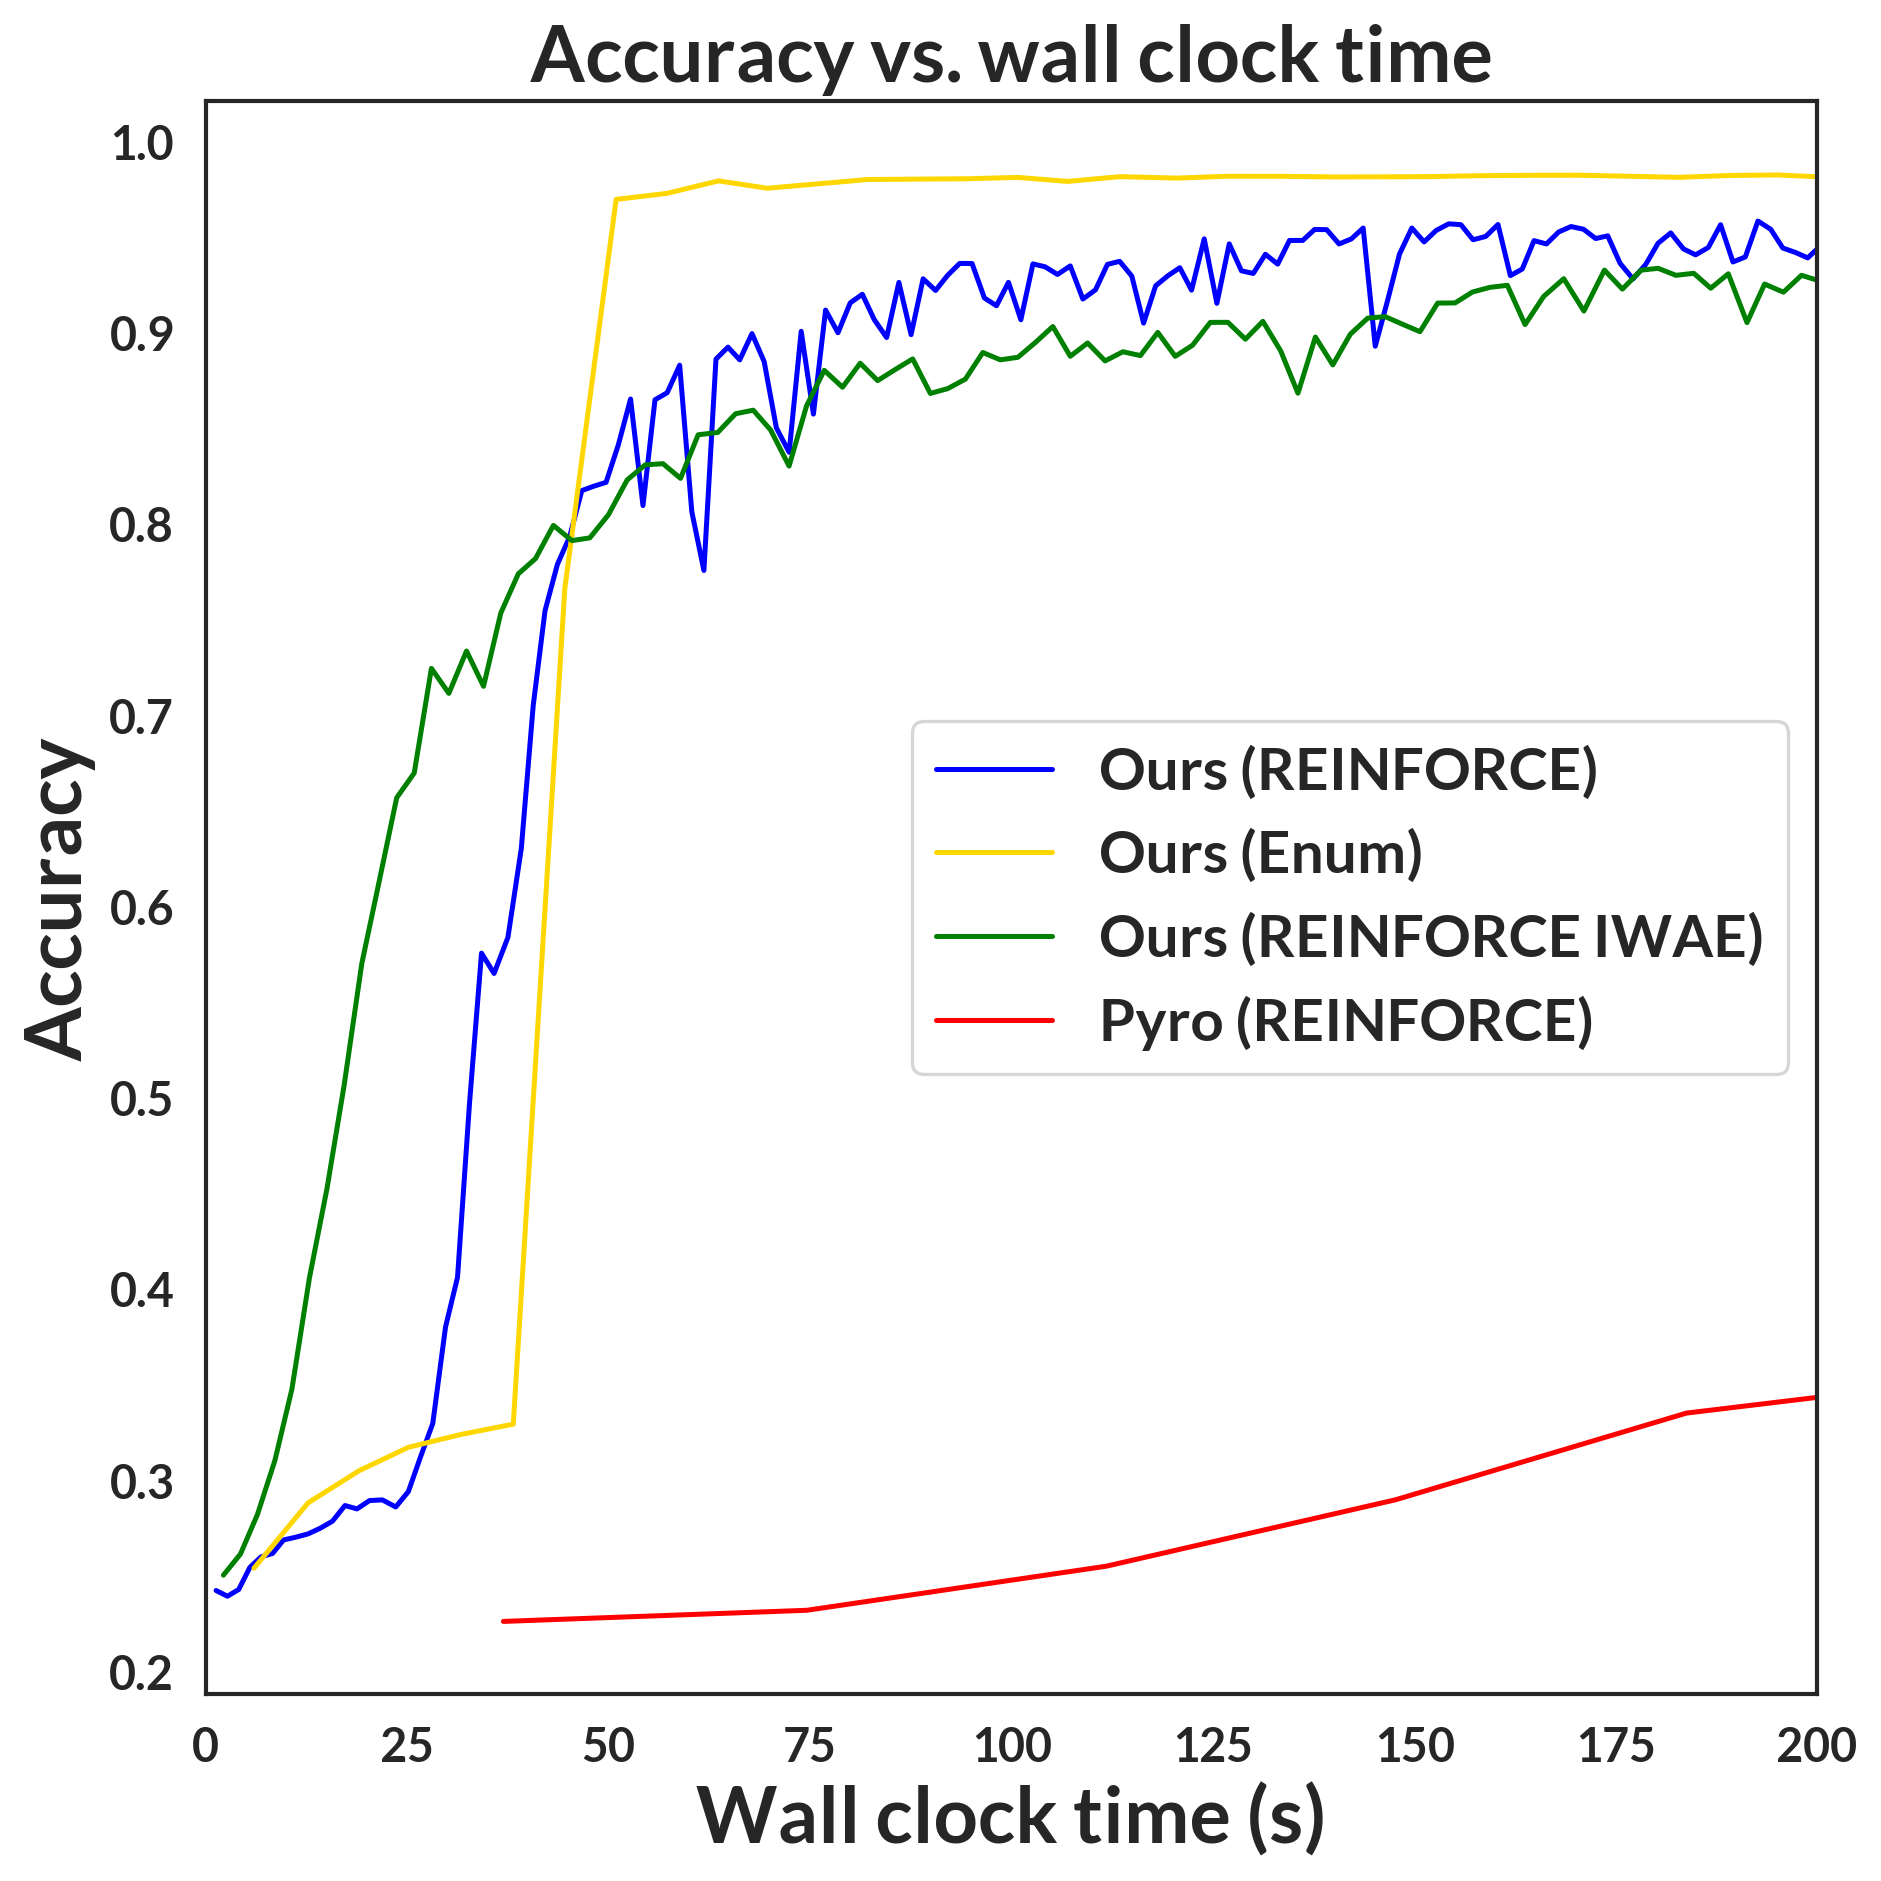

In [87]:
plt.rcParams["text.usetex"] = False
fig, ax = plt.subplots(figsize=(8, 8), dpi=240)
ax.set_xlim(0, 200)
ax.plot(
    np.array(reinforce_air["Epoch wall clock times"]),
    np.array(reinforce_air["Accuracy"]),
    label="Ours (REINFORCE)",
    color="blue",
)
ax.plot(
    np.array(enum_air["Epoch wall clock times"]),
    np.array(enum_air["Accuracy"]),
    label="Ours (Enum)",
    color="gold",
)
ax.plot(
    np.array(reinforce_iwae_air["Epoch wall clock times"]),
    np.array(reinforce_iwae_air["Accuracy"]),
    label="Ours (REINFORCE IWAE)",
    color="green",
)
ax.plot(
    np.array(pyro_reinforce_air["Epoch wall clock times"]),
    np.array(pyro_reinforce_air["Accuracy"]),
    label="Pyro (REINFORCE)",
    color="red",
)

plt.title("Accuracy vs. wall clock time", fontsize=label_fontsize / 3)
plt.xlabel("Wall clock time (s)", fontsize=label_fontsize / 3)
plt.ylabel("Accuracy", fontsize=label_fontsize / 3)
plt.legend(fontsize=label_fontsize / 4)
plt.xticks(fontsize=label_fontsize / 5)
plt.yticks(fontsize=label_fontsize / 5)
plt.legend(fontsize=label_fontsize / 4)
fig.savefig("img/accuracy_vs_wall_clock.pdf", format="pdf")
plt.show()